<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

RowNumber — индекс строки в данных

CustomerId — уникальный идентификатор клиента

Surname — фамилия

CreditScore — кредитный рейтинг

Geography — страна проживания

Gender — пол

Age — возраст

Tenure — сколько лет человек является клиентом банка

Balance — баланс на счёте

NumOfProducts — количество продуктов банка, используемых клиентом

HasCrCard — наличие кредитной карты

IsActiveMember — активность клиента

EstimatedSalary — предполагаемая зарплата

## Подготовка данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import f1_score, roc_auc_score, roc_curve, accuracy_score, mean_absolute_error, confusion_matrix

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import StandardScaler, OneHotEncoder

from sklearn.utils import shuffle

from sklearn.dummy import DummyClassifier

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

from tqdm import tqdm


In [2]:
pd.set_option('display.max_columns', 30)
pd.set_option('mode.chained_assignment', None)

In [3]:
try:
    data = pd.read_csv('m1_s8.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net//datasets//Churn.csv')

In [4]:
data.sample(20)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
785,786,15660155,Lorenzo,792,Spain,Male,36,5.0,92140.15,1,0,1,67468.67,0
9403,9404,15695465,Gibson,638,France,Female,36,6.0,0.00,1,1,0,164247.51,0
3728,3729,15806210,Bateman,675,Spain,Male,66,5.0,115654.47,2,1,1,131970.86,0
7951,7952,15644699,Crawford,850,France,Female,40,0.0,0.00,2,1,0,1099.95,0
9037,9038,15792862,Blinova,653,Germany,Male,41,1.0,104584.11,1,1,0,15126.32,1
3215,3216,15684861,Thomson,726,France,Female,32,8.0,0.00,2,0,0,185075.63,0
5985,5986,15702145,Edments,705,Spain,Male,33,7.0,68423.89,1,1,1,64872.55,0
557,558,15634844,Miller,598,Germany,Male,41,3.0,91536.93,1,1,0,191468.78,1
6732,6733,15718588,Meng,548,France,Female,37,NaN,0.00,2,0,0,98029.58,0
9153,9154,15636977,Trevisan,507,Germany,Male,36,9.0,118214.32,3,1,0,119110.03,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [6]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


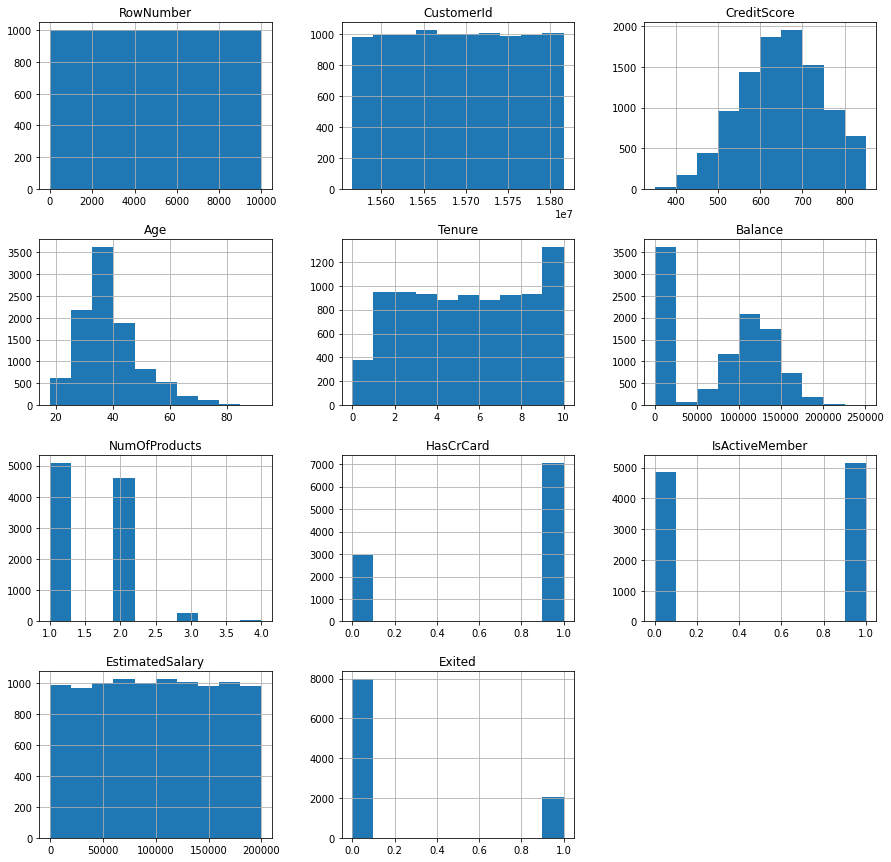

In [7]:
data.hist(figsize=(15,15))
plt.show()

In [8]:
# проверим явные дубликаты
data.duplicated().sum()

0

In [9]:
data[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']].corr()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,-0.003965,-0.000062,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,-0.003965,1.000000,-0.013134,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.000062,-0.013134,1.000000,-0.007911,0.011979,0.027232,-0.032178,0.010520,-0.016761
Balance,0.006268,0.028308,-0.007911,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.012238,-0.030680,0.011979,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,-0.005458,-0.011721,0.027232,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.025651,0.085472,-0.032178,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.001384,-0.007201,0.010520,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
Exited,-0.027094,0.285323,-0.016761,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000


Проблемы по датасету в разрезе текущей задачи:

* Большое количество пропусков в столбце Tenure

* Лишние столбцы - RowNumber, CustomerId, Surname

* Категориальные данные по столбцам Geography и Gender

* Подозрительно низкие значения предполагаемой зарплаты

In [10]:
data[data['Tenure'].isna()].sample(20)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
7089,7090,15690772,Hughes,635,Spain,Female,48,NaN,0.00,2,1,1,136551.25,0
1190,1191,15636935,Rischbieth,797,France,Female,29,NaN,0.00,2,1,1,132975.39,0
6954,6955,15799042,Zaytseva,611,France,Male,38,NaN,0.00,1,1,1,63202.00,0
5636,5637,15626679,Linger,584,France,Male,33,NaN,0.00,2,0,1,59103.13,0
386,387,15721181,Oliver,611,Spain,Male,46,NaN,0.00,2,1,0,45886.33,0
3250,3251,15587419,Shipton,611,France,Male,58,NaN,0.00,2,0,1,107665.68,1
9420,9421,15637324,Kay,657,France,Female,28,NaN,0.00,2,0,1,5177.62,0
94,95,15676966,Capon,730,Spain,Male,42,NaN,0.00,2,0,1,85982.47,0
9822,9823,15781298,Hughes,808,Germany,Male,39,NaN,124216.93,1,0,1,171442.36,0
6726,6727,15633213,Rizzo,628,Spain,Male,50,NaN,0.00,1,0,0,144366.83,1


In [11]:
print(f"Пропусков в столбце Tenure {data['Tenure'].isna().sum() / len(data) *100}%")

Пропусков в столбце Tenure 9.09%


In [12]:
# Заменим пропуски медианным значением
data['Tenure'].fillna(data['Tenure'].median(), inplace=True)

In [13]:
# Удалим лишние столбцы
data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)

In [14]:
data.sort_values('EstimatedSalary').head(15)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
2362,709,Germany,Male,45,4.0,122917.71,1,1,1,11.58,1
9647,625,France,Male,31,5.0,0.00,2,0,1,90.07,0
9010,645,Germany,Female,59,8.0,121669.93,2,0,0,91.75,1
5548,710,France,Male,38,2.0,0.00,2,1,0,96.27,0
4989,629,France,Male,40,5.0,0.00,1,1,0,106.67,0
7565,708,France,Male,52,10.0,105355.81,1,1,0,123.07,1
2498,718,France,Male,37,8.0,0.00,2,1,1,142.81,0
8722,621,France,Male,35,7.0,87619.29,1,1,0,143.34,0
4774,811,France,Female,35,7.0,0.00,1,1,1,178.19,0
1451,551,France,Female,38,10.0,0.00,2,1,1,216.27,0


In [15]:
data = data.query('EstimatedSalary > 50')

data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [16]:
# Создадим выборки для машинного обучения

features = data.drop('Exited', axis=1)
target = data['Exited']

features_train, features_test_and_valid, target_train, target_test_and_valid = train_test_split(features, target, test_size=.4, random_state=11111, stratify=target)

features_test, features_valid, target_test, target_valid = train_test_split(features_test_and_valid, target_test_and_valid, test_size=.5, random_state=11111, stratify=target_test_and_valid)

# Проверим размеры выборок
print('Размеры выборок:')
print(f'Обучающая выборка: {features_train.shape[0]}')
print(f'Тестовая выборка: {features_test.shape[0]}')
print(f'Валидационная выборка: {features_valid.shape[0]}')
print(f"Соотношение: ",
    f"{features_train.shape[0] / (features_train.shape[0] + features_test.shape[0] + features_valid.shape[0]) * 100} :",
    f"{features_test.shape[0] / (features_train.shape[0] + features_test.shape[0] + features_valid.shape[0]) * 100} :",
    f"{features_valid.shape[0] / (features_train.shape[0] + features_test.shape[0] + features_valid.shape[0]) * 100}", end='. ')

Размеры выборок:
Обучающая выборка: 5999
Тестовая выборка: 2000
Валидационная выборка: 2000
Соотношение:  59.995999599959994 : 20.00200020002 : 20.00200020002. 

In [17]:
# Посмотрим уникальные значения по географии и полу
print(data['Geography'].unique())

print(data['Gender'].unique())

['France' 'Spain' 'Germany']
['Female' 'Male']


Закодируем категориальные признаки

In [18]:
features_train

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
9206,624,Germany,Female,52,0.0,133723.43,1,0,0,4859.59
4223,726,Germany,Female,51,8.0,107494.86,2,1,0,140937.91
524,661,France,Male,48,3.0,120320.54,1,0,0,96463.25
3031,678,France,Female,22,4.0,174852.89,1,1,1,28149.06
2780,778,Spain,Male,40,8.0,104291.41,2,1,1,117507.11
...,...,...,...,...,...,...,...,...,...,...
3486,614,Spain,Female,25,5.0,75212.28,1,1,0,58965.04
3970,509,France,Male,30,6.0,0.00,2,1,0,180598.86
3612,635,Spain,Female,37,3.0,0.00,2,1,0,91086.73
920,729,France,Male,44,5.0,0.00,2,0,1,9200.54


In [19]:
# Закодируем категориальные признаки с помощью OHE, посколько уникальных значений немного

#data_ohe = pd.get_dummies(data, drop_first=True)

#data_ohe
cols_for_enc = ['Geography', 'Gender']

encoder = OneHotEncoder(handle_unknown='error', sparse=False)
encoder.fit(features_train[cols_for_enc])
encoded_data = pd.DataFrame(encoder.transform(features_train[cols_for_enc]), columns=encoder.get_feature_names_out(features_train[cols_for_enc].columns))

features_train_ohe = features_train.merge(encoded_data, on=features_train.index).drop(cols_for_enc, axis=1)

encoder.fit(features_test[cols_for_enc])
encoded_data = pd.DataFrame(encoder.transform(features_test[cols_for_enc]), columns=encoder.get_feature_names_out(features_test[cols_for_enc].columns))

features_test_ohe = features_test.merge(encoded_data, on=features_test.index).drop(cols_for_enc, axis=1)


encoder.fit(features_valid[cols_for_enc])
encoded_data = pd.DataFrame(encoder.transform(features_valid[cols_for_enc]), columns=encoder.get_feature_names_out(features_valid[cols_for_enc].columns))

features_valid_ohe = features_valid.merge(encoded_data, on=features_valid.index).drop(cols_for_enc, axis=1)


# И снова проверим размеры
print('Размеры выборок:')
print(f'Обучающая выборка: {features_train_ohe.shape[0]}')
print(f'Тестовая выборка: {features_test_ohe.shape[0]}')
print(f'Валидационная выборка: {features_valid.shape[0]}')
print(f"Соотношение: ",
    f"{features_train_ohe.shape[0] / (features_train_ohe.shape[0] + features_test_ohe.shape[0] + features_valid_ohe.shape[0]) * 100} :",
    f"{features_test_ohe.shape[0] / (features_train_ohe.shape[0] + features_test_ohe.shape[0] + features_valid_ohe.shape[0]) * 100} :",
    f"{features_valid_ohe.shape[0] / (features_train_ohe.shape[0] + features_test_ohe.shape[0] + features_valid_ohe.shape[0]) * 100}", end='. ')


Размеры выборок:
Обучающая выборка: 5999
Тестовая выборка: 2000
Валидационная выборка: 2000
Соотношение:  59.995999599959994 : 20.00200020002 : 20.00200020002. 

c:\Users\apple\anaconda3\envs\ds_practicum_env\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\Users\apple\anaconda3\envs\ds_practicum_env\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\Users\apple\anaconda3\envs\ds_practicum_env\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Поскольку признаки имеют разный масштаб, необходимо их масштабировать

In [20]:
cols_for_scale = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary', 'Tenure', 'NumOfProducts']

scaler = StandardScaler()
scaler.fit(features_train[cols_for_scale])
features_train_ohe[cols_for_scale] = scaler.transform(features_train_ohe[cols_for_scale])
features_valid_ohe[cols_for_scale] = scaler.transform(features_valid_ohe[cols_for_scale])
features_test_ohe[cols_for_scale] = scaler.transform(features_test_ohe[cols_for_scale])

features_train_ohe

,key_0,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,9206,-0.267407,1.241890,-1.810387,0.916553,-0.912544,0,0,-1.674895,0.0,1.0,0.0,1.0,0.0
1,4223,0.793851,1.146700,1.098938,0.496564,0.802478,1,0,0.716510,0.0,1.0,0.0,1.0,0.0
2,524,0.117559,0.861132,-0.719390,0.701937,-0.912544,0,0,-0.065076,1.0,0.0,0.0,0.0,1.0
3,3031,0.294436,-1.613793,-0.355724,1.575144,-0.912544,1,1,-1.265612,1.0,0.0,0.0,1.0,0.0
4,2780,1.334885,0.099616,1.098938,0.445269,0.802478,1,1,0.304743,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5994,3486,-0.371452,-1.328225,0.007941,-0.020365,-0.912544,1,0,-0.724060,0.0,0.0,1.0,1.0,0.0
5995,3970,-1.463924,-0.852278,0.371607,-1.224712,0.802478,1,0,1.413501,1.0,0.0,0.0,0.0,1.0
5996,3612,-0.152958,-0.185952,-0.719390,-1.224712,0.802478,1,0,-0.159561,0.0,0.0,1.0,1.0,0.0
5997,920,0.825065,0.480374,0.007941,-1.224712,0.802478,0,1,-1.598608,1.0,0.0,0.0,0.0,1.0


In [21]:
# Вернем имена, дабы не менять весь код дальше
features_train = features_train_ohe
features_test = features_test_ohe
features_valid = features_valid_ohe

Краткий вывод по подготовке.

Полученные данные загружены, бегло исследованы. Удалены пропуски, подозрительные значения. 

Полученный датасет разбит на три выборки: обучающую, валидационную и тестовую. Заведены категории для локации и пола.

## Исследование задачи

In [22]:
def roc_graph(target_valid, probabilities_one_valid):
    fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)
    plt.figure()
    plt.plot(fpr, tpr, color="darkorange") 
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.xlim([-0.02, 1.0])
    plt.ylim([0.0, 1.02])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC-кривая") 
    plt.grid()
    plt.show()

100%|██████████| 14/14 [00:00<00:00, 43.28it/s]

F1-мера модели решающего дерева равна 0.5937072503419973 при глубине 7
ROC-AUC: 0.6958653568823061


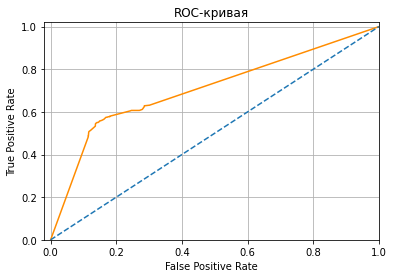

In [23]:
# Протестируем модели машинного обучения, оценим F1-score
best_score = 0


for depth in tqdm(range(1,15)):
    model_DT = DecisionTreeClassifier(random_state=11111, max_depth=depth)
    model_DT.fit(features_train, target_train)
    predictions_valid = model_DT.predict(features_valid)
    if f1_score(target_valid, predictions_valid) > best_score:
        best_score = f1_score(target_valid, predictions_valid)
        best_depth = depth

best_score_DT = best_score


print(f'F1-мера модели решающего дерева равна {best_score} при глубине {best_depth}')
print(f'ROC-AUC: {roc_auc_score(target_valid, predictions_valid)}')
roc_graph(target_valid, model_DT.predict_proba(features_valid)[:, 1])

100%|██████████| 14/14 [02:14<00:00,  9.60s/it]

F1-мера модели леса деревьев равна 0.5763779527559055 при глубине 12 и числе деревьев 170
ROC-AUC: 0.7042350516926787


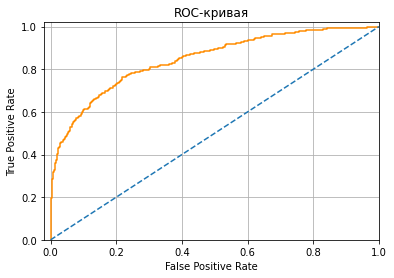

In [24]:
# Протестируем модели машинного обучения, оценим точность

best_score = 0

for depth in tqdm(range(1,15)):
    for est in range(10, 200, 10):
        model_RF = RandomForestClassifier(random_state=11111, max_depth=depth, n_estimators=est)
        model_RF.fit(features_train, target_train)
        predictions_valid = model_RF.predict(features_valid)
        if f1_score(target_valid, predictions_valid) > best_score:
            best_score = f1_score(target_valid, predictions_valid)
            best_depth = depth
            best_est = est

best_score_RF = best_score

print(f'F1-мера модели леса деревьев равна {best_score_RF} при глубине {best_depth} и числе деревьев {best_est}')
print(f'ROC-AUC: {roc_auc_score(target_valid, predictions_valid)}')
roc_graph(target_valid, model_RF.predict_proba(features_valid)[:, 1])

F1-мера модели логистической регрессии равна 0.35
ROC-AUC: 0.6031300946555183


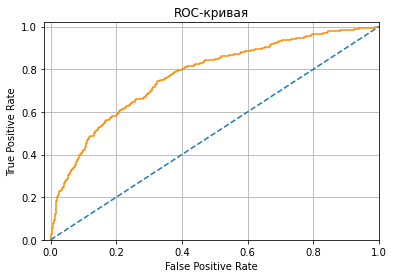

In [25]:
best_score = 0
model_LR = LogisticRegression(random_state=11111, solver='liblinear')
model_LR.fit(features_train, target_train)
predictions_valid = model_LR.predict(features_valid)
if f1_score(target_valid, predictions_valid) > best_score:
            best_score = f1_score(target_valid, predictions_valid)

best_score_LR = best_score


print(f'F1-мера модели логистической регрессии равна {best_score_LR}')
print(f'ROC-AUC: {roc_auc_score(target_valid, predictions_valid)}')
roc_graph(target_valid, model_LR.predict_proba(features_valid)[:, 1])

In [26]:
print(f'Лучшая F1-мера - {max([best_score_DT, best_score_RF, best_score_LR])}')

Лучшая F1-мера - 0.5937072503419973


Лучшие результаты показала модель дерева решений с параметрами глубины 7.

Прдварительно будем использовать ее.

Далее посмотрим на баланс классов в исходном датасете и в предсказаниях модели

In [27]:
freq_predicted = pd.Series(model_DT.predict(features_valid)).value_counts(normalize=True)
freq_real = data['Exited'].value_counts(normalize=True)

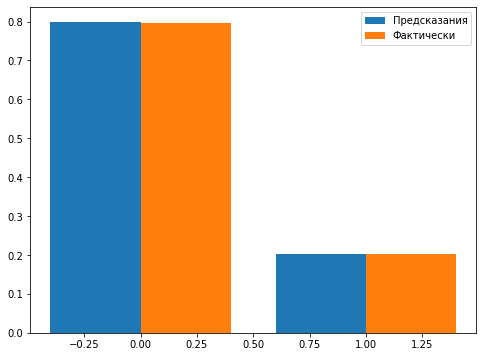

In [28]:
fig, ax = plt.subplots(figsize=(8,6))

ax.bar(freq_predicted.index - .2, freq_predicted, width = 0.4, label='Предсказания')
ax.bar(freq_real.index +.2, freq_real, width = 0.4, label='Фактически')

ax.legend()
plt.show()

В целевом признаке налицо дисбаланс - нулей почти в 4 раза больше единиц.

Оценим модель на адекватность - сравним с предсказаниями константной модели

In [29]:
dummy_clf = DummyClassifier(strategy="most_frequent", random_state=11111)
dummy_clf.fit(features_train, target_train)
dummy_predictions = dummy_clf.predict(features_valid)
dummy_clf.score(dummy_predictions, target_valid)

0.7965

Модель предсказывает лучше константной, следовательно, она адекватна.

Посчитаем F1-меру.


In [30]:
model_DT = RandomForestClassifier(random_state=11111, max_depth=7)
model_DT.fit(features_train, target_train)

predicted_valid_DT = model_DT.predict(features_valid)

f1_score(target_valid, predicted_valid_DT)


0.5254237288135594

Краткий вывод.

В данных обнаружен дисбаланс классов (положительного красса почти в 4 раза меньше отрицательного).

F1-мера недостаточна. Требуется балансировка классов.

## Борьба с дисбалансом

Попробуем переобучить модели с использованием параметра class_weight и посмотрим на изменение Ф1-меры

100%|██████████| 14/14 [00:00<00:00, 35.30it/s]

F1-мера модели решающего дерева равна 0.5589692765113975 при глубине 6
ROC-AUC: 0.6943129570248214


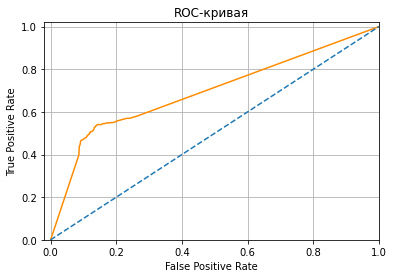

In [31]:
best_score = 0


for depth in tqdm(range(1,15)):
    model_DT = DecisionTreeClassifier(random_state=11111, max_depth=depth, class_weight='balanced')
    model_DT.fit(features_train, target_train)
    predictions_valid = model_DT.predict(features_valid)
    if f1_score(target_valid, predictions_valid) > best_score:
        best_score = f1_score(target_valid, predictions_valid)
        best_depth = depth

best_score_DT = best_score


print(f'F1-мера модели решающего дерева равна {best_score} при глубине {best_depth}')
print(f'ROC-AUC: {roc_auc_score(target_valid, predictions_valid)}')
roc_graph(target_valid, model_DT.predict_proba(features_valid)[:, 1])

F1-мера модели логистической регрессии равна 0.49822695035460995
ROC-AUC: 0.7071046393080291


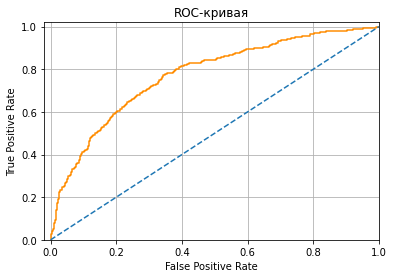

In [32]:
best_score = 0
model_LR = LogisticRegression(random_state=11111, solver='liblinear', class_weight='balanced')
model_LR.fit(features_train, target_train)
predictions_valid = model_LR.predict(features_valid)
if f1_score(target_valid, predictions_valid) > best_score:
            best_score = f1_score(target_valid, predictions_valid)

best_score_LR = best_score


print(f'F1-мера модели логистической регрессии равна {best_score_LR}')
print(f'ROC-AUC: {roc_auc_score(target_valid, predictions_valid)}')
roc_graph(target_valid, model_LR.predict_proba(features_valid)[:, 1])

100%|██████████| 14/14 [02:13<00:00,  9.53s/it]

F1-мера модели леса деревьев равна 0.6189967982924227 при глубине 7 и числе деревьев 140
ROC-AUC: 0.7182143622821588


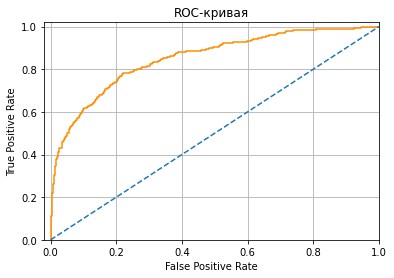

In [33]:
# Протестируем модели машинного обучения, оценим точность

best_score = 0

for depth in tqdm(range(1,15)):
    for est in range(10, 200, 10):
        model_RF = RandomForestClassifier(random_state=11111, max_depth=depth, n_estimators=est, class_weight='balanced')
        model_RF.fit(features_train, target_train)
        predictions_valid = model_RF.predict(features_valid)
        if f1_score(target_valid, predictions_valid) > best_score:
            best_score = f1_score(target_valid, predictions_valid)
            best_depth = depth
            best_est = est

best_score_RF = best_score

print(f'F1-мера модели леса деревьев равна {best_score_RF} при глубине {best_depth} и числе деревьев {best_est}')
print(f'ROC-AUC: {roc_auc_score(target_valid, predictions_valid)}')
roc_graph(target_valid, model_RF.predict_proba(features_valid)[:, 1])

Попробуем использовать up- и downsampling

In [34]:

smote = SMOTE(random_state=11111)
features_train_res, target_train_res = smote.fit_resample(features_train, target_train)

rus = RandomUnderSampler(random_state=11111)
features_downsampled, target_dowmsampled = rus.fit_resample(features_train, target_train)

In [35]:
print('Размеры выборок:')
print(f'Обучающая выборка (upsampled): {features_train_res.shape[0]}')
print(f'Валидационная выборка (upsampled): {target_train_res.shape[0]}')

print(f'Обучающая выборка (downsampled): {features_downsampled.shape[0]}')
print(f'Валидационная выборка (downsampled): {target_dowmsampled.shape[0]}')


Размеры выборок:
Обучающая выборка (upsampled): 9554
Валидационная выборка (upsampled): 9554
Обучающая выборка (downsampled): 2444
Валидационная выборка (downsampled): 2444


In [36]:
best_score = 0


for depth in tqdm(range(1,15)):
    model_DT = DecisionTreeClassifier(random_state=11111, max_depth=depth)
    model_DT.fit(features_train_res, target_train_res)
    predictions_valid = model_DT.predict(features_valid)
    if f1_score(target_valid, predictions_valid) > best_score:
        best_score = f1_score(target_valid, predictions_valid)
        best_depth = depth

best_score_DT = best_score


print(f'F1-мера модели решающего дерева равна {best_score} при глубине {best_depth}')


best_score = 0


for depth in tqdm(range(1,15)):
    model_DT = DecisionTreeClassifier(random_state=11111, max_depth=depth)
    model_DT.fit(features_downsampled, target_dowmsampled)
    predictions_valid = model_DT.predict(features_valid)
    if f1_score(target_valid, predictions_valid) > best_score:
        best_score = f1_score(target_valid, predictions_valid)
        best_depth = depth

best_score_DT = best_score


print(f'F1-мера модели решающего дерева равна {best_score} при глубине {best_depth}')


100%|██████████| 14/14 [00:00<00:00, 23.34it/s]


F1-мера модели решающего дерева равна 0.5841184387617767 при глубине 7


100%|██████████| 14/14 [00:00<00:00, 89.05it/s]

F1-мера модели решающего дерева равна 0.5666316894018888 при глубине 5


In [37]:
best_score = 0
model_LR = LogisticRegression(random_state=11111, solver='liblinear')
model_LR.fit(features_train_res, target_train_res)
predictions_valid = model_LR.predict(features_valid)
if f1_score(target_valid, predictions_valid) > best_score:
            best_score = f1_score(target_valid, predictions_valid)

best_score_LR = best_score

model_LR = LogisticRegression(random_state=11111, solver='liblinear')
model_LR.fit(features_train_res, target_train_res)
prediction_valid_LR = model_LR.predict(features_valid)

print(f'F1-upsampled мера модели логистической регрессии равна {best_score_LR}')

best_score = 0
model_LR = LogisticRegression(random_state=11111, solver='liblinear')
model_LR.fit(features_downsampled, target_dowmsampled)
predictions_valid = model_LR.predict(features_valid)
if f1_score(target_valid, predictions_valid) > best_score:
            best_score = f1_score(target_valid, predictions_valid)

best_score_LR = best_score

print(f'F1-downsampled мера модели логистической регрессии равна {best_score_LR}')

F1-upsampled мера модели логистической регрессии равна 0.49389671361502346
F1-downsampled мера модели логистической регрессии равна 0.48915871639202074


In [38]:
best_score = 0

for depth in tqdm(range(1,15)):
    for est in range(10, 200, 10):
        model_RF = RandomForestClassifier(random_state=11111, max_depth=depth, n_estimators=est)
        model_RF.fit(features_train_res, target_train_res)
        predictions_valid = model_RF.predict(features_valid)
        if f1_score(target_valid, predictions_valid) > best_score:
            best_score = f1_score(target_valid, predictions_valid)
            best_depth = depth
            best_est = est

best_score_RF = best_score

print(f'F1-upsampled мера модели леса деревьев равна {best_score_RF} при глубине {best_depth} и числе деревьев {best_est}')

best_score = 0

for depth in tqdm(range(1,15)):
    for est in range(10, 200, 10):
        model_RF = RandomForestClassifier(random_state=11111, max_depth=depth, n_estimators=est)
        model_RF.fit(features_downsampled, target_dowmsampled)
        predictions_valid = model_RF.predict(features_valid)
        if f1_score(target_valid, predictions_valid) > best_score:
            best_score = f1_score(target_valid, predictions_valid)
            best_depth = depth
            best_est = est

best_score_RF = best_score

print(f'F1-downsampled мера модели леса деревьев равна {best_score_RF} при глубине {best_depth} и числе деревьев {best_est}')


100%|██████████| 14/14 [03:37<00:00, 15.52s/it]


F1-upsampled мера модели леса деревьев равна 0.6036671368124118 при глубине 13 и числе деревьев 100


100%|██████████| 14/14 [01:13<00:00,  5.26s/it]

F1-downsampled мера модели леса деревьев равна 0.5933649289099525 при глубине 7 и числе деревьев 160


Протестируем изменение порога

In [39]:
model_DT = DecisionTreeClassifier(random_state=11111, max_depth=6)
model_DT.fit(features_train, target_train)
probalities_one_valid_DT = model_DT.predict_proba(features_valid)[:, 1]

model_LR = LogisticRegression(random_state=11111, solver='liblinear')
model_LR.fit(features_train, target_train)
probalities_one_valid_LR = model_LR.predict_proba(features_valid)[:, 1]

model_RF = RandomForestClassifier(random_state=11111, max_depth=7, n_estimators=30)
model_RF.fit(features_train, target_train)
probalities_one_valid_RF = model_RF.predict_proba(features_valid)[:, 1]

In [40]:
def treshold(predicted_ones_valid_model):
    best_f1 = 0
    for treshold in np.arange(0, .8, .02):
        predicted_valid = predicted_ones_valid_model > treshold
        if f1_score(target_valid, predicted_valid) > best_f1:
            best_f1 = f1_score(target_valid, predicted_valid)
            best_treshold = treshold
    return best_f1, best_treshold

best_f1_DT, best_treshold_DT = treshold(probalities_one_valid_DT)
best_f1_LR, best_treshold_LR = treshold(probalities_one_valid_LR)
best_f1_RF, best_treshold_RF = treshold(probalities_one_valid_RF)

print(f'Дерево решений     - F1-мера: {best_f1_LR} при пороге {best_treshold_DT}')
print(f'Линейная регрессия - F1-мера: {best_f1_LR} при пороге {best_treshold_LR}')
print(f'Случайный лес      - F1-мера: {best_f1_RF} при пороге {best_treshold_RF}')

Дерево решений     - F1-мера: 0.5033112582781456 при пороге 0.34
Линейная регрессия - F1-мера: 0.5033112582781456 при пороге 0.28
Случайный лес      - F1-мера: 0.6124852767962309 при пороге 0.28


Проверим еще раз гиперпараметры случайного леса при балансировке классов

In [41]:
best_score = 0

for depth in tqdm(range(1,15)):
    for est in range(10, 200, 10):
        model_RF = RandomForestClassifier(random_state=11111, max_depth=depth, n_estimators=est, class_weight='balanced')
        model_RF.fit(features_train, target_train)
        predictions_valid = model_RF.predict(features_valid)
        if f1_score(target_valid, predictions_valid) > best_score:
            best_score = f1_score(target_valid, predictions_valid)
            best_depth = depth
            best_est = est

best_score_RF = best_score

print(f'F1-мера модели леса деревьев равна {best_score_RF} при глубине {best_depth} и числе деревьев {best_est}')

100%|██████████| 14/14 [02:14<00:00,  9.59s/it]

F1-мера модели леса деревьев равна 0.6189967982924227 при глубине 7 и числе деревьев 140


Краткий вывод.

После балансировки классов случайный лес в рамках текущей задачи выдал больший показатель Ф1-меры. 

Лучшие результаты в борьбе с дисбалансом классов показал параметр class_weight



## Тестирование модели

Итак, мы нашли лучшую модель. 

Проверим, насколько она отличается от случайной модели, с помощью ROC-AUC.

In [42]:
# Обучим лучшую модель с финальными гиперпараметрами

best_model = RandomForestClassifier(random_state=11111, max_depth=7, n_estimators=140, class_weight='balanced')


best_model.fit(features_train, target_train)
best_f1_score = f1_score(target_test, best_model.predict(features_test))

print(f'Ф1-мера:', best_f1_score)

Ф1-мера: 0.5950054288816504


In [43]:
# Объединим тренировочную и валидационную выборки для лучшего обучения
features_big_train = pd.concat([features_train, features_valid])
target_big_train = pd.concat([target_train, target_valid])

best_model.fit(features_big_train, target_big_train)
best_f1_score = f1_score(target_test, best_model.predict(features_test))

print(f'Ф1-мера:', best_f1_score)

Ф1-мера: 0.5991471215351812


F1-мера немного улучшилась с объединением тренировочной и валидационной выборок

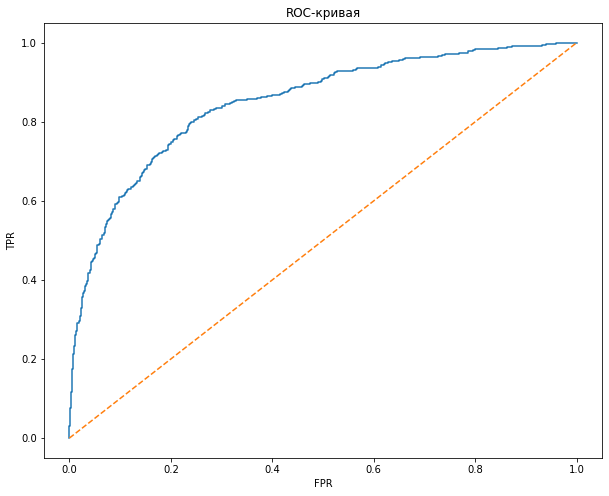

ROC-AUC-мера модели: 0.8482827974353397


In [44]:
probalities_one_valid = best_model.predict_proba(features_test)[:, 1]

fpr, tpr, thresholds = roc_curve(target_test, probalities_one_valid)

plt.figure(figsize=(10, 8))
plt.xlabel("FPR")
plt.ylabel("TPR")

plt.title('ROC-кривая')

plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')



plt.show()

print(f'ROC-AUC-мера модели: {roc_auc_score(target_test, probalities_one_valid)}')

Полученный результат больше результата случайной модели (0,5), значит, модель хорошая

## Общий вывод

По данным оттока клиентов банка были проведены сделующие действия.

1. Данные исследованы, предобработаны (исслледованы на пропуски, дубликаты). Обработанные данные разбиты на три выборки (тренировочную, валидационную и тестовую). Категориальные признаки преобразованные в численные методом OHE-кодирования. Выборки масштабированы с помощью стандартизации.

2. Исследован баланс классов - данные требуют балансировки. Без учета баланса выявлена лучшая модель (случайный лес), ей подобраны оптимальные гиперпараметры.

3. Проверены несколько вариантов балансировки классов - class_weight, up- и downsampling, изменение порога. Лучший результат показал аргумент class_weight. Модель переобучена с учетом балансировки, подобраны новые оптимальные гиперпараметры.

4. Для более полного обучения модели объединены обучающая и валидационная выборки. Модель обучена на новых выборках. Оценены F1-мера (> 0,59) и ROC-AUC-мера (0,848).

Исходя из вышесказанного, полученная модель может прогнозировать отток клиентов.
